### Chancellor occupations
This notebook illustrates basic feature extraction techniques, as presented by:<br>
[1] P. Ristoski and H. Paulheim, “A comparison of propositionalization strategies for creating features from linked open data,” in Proceedings of the 1st International Conference on Linked Data for Knowledge Discovery - Volume 1232, Aachen, DEU, Sep. 2014, pp. 1–11.

Query results can be replicated [here](https://query.wikidata.org/#SELECT%20%3FchancellorLabel%20%3FinaugurationTime%20%3FoccupationLabel%20WHERE%20%7B%0A%20%20BIND%28wd%3AQ183%20AS%20%3Fgermany%29%0A%20%20%0A%20%20%3Fgermany%20p%3AP6%20%5Bps%3AP6%20%3Fchancellor%3B%20pq%3AP580%20%3FinaugurationTime%5D.%0A%20%20%3Fchancellor%20wdt%3AP106%20%3Foccupation.%0A%20%20%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D%20ORDER%20BY%20%3FinaugurationTime) (Wikidata).

In [1]:
import pandas as pd
import math

df = pd.read_csv("chancellor_occupations.tsv", sep="\t")

In [2]:
df.head(3)

,chancellorLabel,inaugurationTime,occupationLabel
0,Konrad Adenauer,1949-09-20T00:00:00Z,judge
1,Konrad Adenauer,1949-09-20T00:00:00Z,lawyer
2,Konrad Adenauer,1949-09-20T00:00:00Z,politician


In [3]:
chancellorIndex = df.groupby("inaugurationTime").first().chancellorLabel

In [4]:
df = df.pivot(index="inaugurationTime", columns="occupationLabel", values="occupationLabel").fillna(0)
df[df != 0] = 1
df = df.set_index(chancellorIndex)

In [5]:
# Binary feature extraction
df.transpose().to_csv("binary_extraction.csv")
df

occupationLabel,assessor,autobiographer,civil servant,consultant,economist,historian,journalist,judge,lawyer,lobbyist,military personnel,non-fiction writer,physicist,political scientist,politician,resistance fighter,university teacher,writer
chancellorLabel,,,,,,,,,,,,,,,,,,
Konrad Adenauer,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0
Ludwig Erhard,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
Kurt Georg Kiesinger,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
Willy Brandt,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
Walter Scheel,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Helmut Schmidt,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
Helmut Kohl,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
Gerhard Schröder,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0
Angela Merkel,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [6]:
for index, row in df.iterrows():
    df.loc[index] = row.div(row.sum())
df = df.astype(float)

# Relative Count feature extraction
df.round(3).transpose().to_csv("relative_count_extraction.csv")
df.round(3)

occupationLabel,assessor,autobiographer,civil servant,consultant,economist,historian,journalist,judge,lawyer,lobbyist,military personnel,non-fiction writer,physicist,political scientist,politician,resistance fighter,university teacher,writer
chancellorLabel,,,,,,,,,,,,,,,,,,
Konrad Adenauer,0.167,0.167,0.0,0.0,0.000,0.000,0.00,0.167,0.167,0.0,0.0,0.00,0.0,0.000,0.167,0.167,0.000,0.0
Ludwig Erhard,0.000,0.000,0.0,0.0,0.333,0.000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.000,0.333,0.000,0.333,0.0
Kurt Georg Kiesinger,0.000,0.000,0.0,0.0,0.000,0.000,0.00,0.333,0.333,0.0,0.0,0.00,0.0,0.000,0.333,0.000,0.000,0.0
Willy Brandt,0.000,0.250,0.0,0.0,0.000,0.000,0.25,0.000,0.000,0.0,0.0,0.25,0.0,0.000,0.250,0.000,0.000,0.0
Walter Scheel,0.000,0.000,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.0,0.5,0.00,0.0,0.000,0.500,0.000,0.000,0.0
Helmut Schmidt,0.000,0.000,0.2,0.0,0.200,0.000,0.00,0.000,0.000,0.0,0.0,0.20,0.0,0.000,0.200,0.000,0.000,0.2
Helmut Kohl,0.000,0.000,0.0,0.0,0.000,0.333,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.333,0.333,0.000,0.000,0.0
Gerhard Schröder,0.000,0.000,0.0,0.2,0.000,0.000,0.00,0.000,0.200,0.2,0.0,0.20,0.0,0.000,0.200,0.000,0.000,0.0
Angela Merkel,0.000,0.000,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.00,0.5,0.000,0.500,0.000,0.000,0.0


TF-IDF, according to [1]:
$$\frac{1}{n} \cdot{} log(\frac{N}{|{r|C(r)}|})$$

$1/n$ is the relative count as displayed above.<br>
$N$ is the total number of resources (chancellors).<br>
$|{r|C(r)}|$ is the number of resources that share the relation (occupation) r.

In [7]:
N = len(df)

In [239]:
for occupation in df:
    multiplicity = df[occupation].gt(0).sum()
    df[occupation] = df[occupation].apply(lambda v: v * math.log(N/multiplicity))

In [240]:
df.round(3).transpose().to_csv("tfidf_extraction.csv")
df.round(3)

occupationLabel,assessor,autobiographer,civil servant,consultant,economist,historian,journalist,judge,lawyer,lobbyist,military personnel,non-fiction writer,physicist,political scientist,politician,resistance fighter,university teacher,writer
chancellorLabel,,,,,,,,,,,,,,,,,,
Konrad Adenauer,0.384,0.268,0.000,0.000,0.000,0.000,0.000,0.268,0.153,0.000,0.000,0.000,0.000,0.000,0.0,0.384,0.000,0.000
Ludwig Erhard,0.000,0.000,0.000,0.000,0.536,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.768,0.000
Kurt Georg Kiesinger,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.536,0.305,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000
Willy Brandt,0.000,0.402,0.000,0.000,0.000,0.000,0.576,0.000,0.000,0.000,0.000,0.301,0.000,0.000,0.0,0.000,0.000,0.000
Walter Scheel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.151,0.000,0.000,0.000,0.0,0.000,0.000,0.000
Helmut Schmidt,0.000,0.000,0.461,0.000,0.322,0.000,0.000,0.000,0.000,0.000,0.000,0.241,0.000,0.000,0.0,0.000,0.000,0.461
Helmut Kohl,0.000,0.000,0.000,0.000,0.000,0.768,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.768,0.0,0.000,0.000,0.000
Gerhard Schröder,0.000,0.000,0.000,0.461,0.000,0.000,0.000,0.000,0.183,0.461,0.000,0.241,0.000,0.000,0.0,0.000,0.000,0.000
Angela Merkel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.151,0.000,0.0,0.000,0.000,0.000


In [105]:
import pandas as pd
import os.path
import pickle
import json
from pathlib import Path
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker
from sklearn.svm import SVC
from evaluation_framework.manager import FrameworkManager

dbpedia = KG("http://localhost:3030/dbpedia", skip_verify=False, mul_req=False)
            
transformer = RDF2VecTransformer(
    Word2Vec( sg=0, vector_size=2),
    walkers=[RandomWalker(max_walks=500, max_depth=8, with_reverse=False, n_jobs=1, md5_bytes=None)],
    verbose=1
)

people = ["http://dbpedia.org/resource/" + x for x in ["Berlin", "Frankfurt", "Hamburg", "Munich", "Leipzig", "Hanover", "Heidelberg", "Mannheim", "New_York", "Chicago", "Atlanta", "Los_Angeles", "Philadelphia"]]
x = transformer.fit_transform(dbpedia, people)



100%|██████████| 13/13 [00:42<00:00,  3.29s/it]


Extracted 6500 walks for 13 entities (42.8493s)
Fitted 6500 walks (0.2154s)


In [110]:
y

113.01446

In [109]:
transformer.embedder._model.wv.most_similar("http://dbpedia.org/resource/Berlin")

[('http://dbpedia.org/resource/Category:Government_of_California',
  0.9999996423721313),
 ('http://dbpedia.org/resource/Category:West_Coast_of_the_United_States',
  0.9999990463256836),
 ('http://dbpedia.org/resource/Category:Member_states_of_the_United_Nations',
  0.9999989867210388),
 ('http://dbpedia.org/resource/Category:Majority–minority_relations',
  0.9999983310699463),
 ('http://dbpedia.org/resource/Category:Wikipedia_article_lists',
  0.9999982118606567),
 ('http://dbpedia.org/resource/Category:Lists_of_cities', 0.9999980926513672),
 ('Government of Chicago, Illinois', 0.9999974966049194),
 ('Planned cities in the United States', 0.9999955892562866),
 ('Honorary titles', 0.9999937415122986),
 ('http://dbpedia.org/resource/Category:Years_in_Europe', 0.9999933838844299)]

<AxesSubplot:xlabel='0', ylabel='1'>

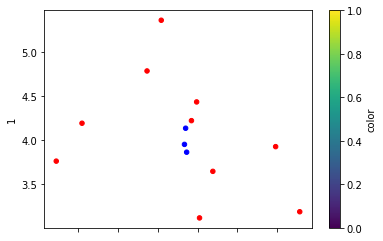

In [107]:
y = pd.DataFrame(x[0])
y["color"] = "#0000ff"
y.loc[:9, "color"] = "#ff0000"

y.plot.scatter(0, 1, c="color")

(-203.29354858398438, 180.2001953125, -251.50836067199708, 130.37268714904786)

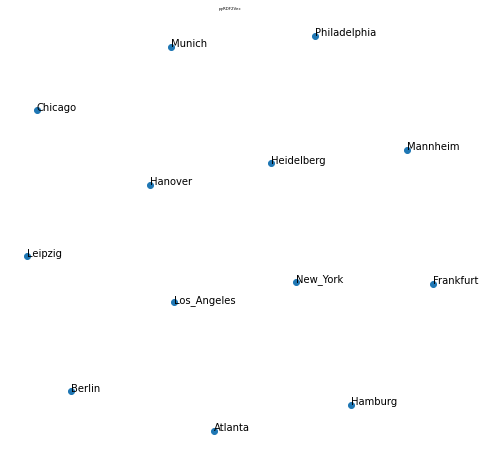

In [108]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce the dimensions of entity embeddings to represent them in a 2D plane.
X_tsne = TSNE(random_state=42).fit_transform(transformer._embeddings[:])

#colors = list(map(lambda e: "#00ff00" if movieFull[movieFull.DBpedia_URI==e].iloc[0].label == "good" else "#ff0000", transformer._entities[:]))
#sizes = list(map(lambda e: abs(50-movieFull[movieFull.DBpedia_URI==e].iloc[0].rating)**2, transformer._entities[:]))

# Plot the embeddings of entities in a 2D plane, annotating them.
f = plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])#c=colors, s=sizes)
for x, y, t in zip(X_tsne[:, 0], X_tsne[:, 1], transformer._entities):
    plt.annotate(t.split("/")[-1], (x, y))

# Display the graph with a title, removing the axes for better readability.
plt.title("pyRDF2Vec", fontsize=4)
plt.axis("off")
#plt.show()

#f.savefig(os.path.join(movieLocation, "figure.pdf"), bbox_inches='tight')

In [113]:
import requests
r = requests.get("http://kgvec2go.org/rest/get-vector/dbpedia/Angela_Merkel")

In [198]:
politicians = ["Angela_Merkel", "Konrad_Adenauer", "Ludwig_Erhard", "Kurt_Georg_Kiesinger", "Willy_Brandt", "Walter_Scheel", "Helmut_Schmidt", "Helmut_Kohl", "Gerhard_Schröder", "Olaf Scholz"]
#cities = ["Berlin", "Paris", "Rome", "Madrid", "London", "Kyiv", "Vienna", "Bern", "Warsaw"]
heroes = ["Batman", "Princess_Leia", "Morpheus_(The_Matrix)", "Spider-Man", "Sansa_Stark", "Frodo_Baggins", "Harry_Potter", "Ron_Weasley", "Sheldon_Cooper", "Nyota_Uhura", "Hermione_Granger", "Albus_Dumbledore", "Shrek_(character)"]

df = pd.DataFrame()

for p in politicians + heroes:
    print(p)
    r = requests.get("http://kgvec2go.org/rest/get-vector/dbpedia/"+p)
    df = df.append({i: v for i,v in enumerate(json.loads(r.text)["vector"])}, ignore_index=True)


df["label"] = politicians + heroes
df["color"] = ["#ff0000"] * len(politicians) + ["#0000ff"] * len(heroes) 

Angela_Merkel
Konrad_Adenauer
Ludwig_Erhard
Kurt_Georg_Kiesinger
Willy_Brandt
Walter_Scheel
Helmut_Schmidt
Helmut_Kohl
Gerhard_Schröder
Olaf Scholz
Batman
Princess_Leia
Morpheus_(The_Matrix)
Spider-Man
Sansa_Stark
Frodo_Baggins
Harry_Potter
Ron_Weasley
Sheldon_Cooper
Nyota_Uhura
Hermione_Granger
Albus_Dumbledore
Shrek_(character)


In [199]:
df = df.sample(frac=1)
df

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,label,color
1,0.002968,-0.311249,0.587271,-0.481734,-0.592423,0.002600,0.780522,0.178884,-0.130990,0.380011,...,0.341483,0.905834,0.403832,-0.608662,-0.134813,0.278884,-0.403272,-0.597900,Konrad_Adenauer,#ff0000
13,-0.141743,-0.084609,0.042262,-0.410263,-0.510923,0.155499,0.388380,0.199494,-0.000740,0.419468,...,-0.055232,0.047580,0.084331,0.181575,0.022636,-0.060975,0.183405,0.107328,Spider-Man,#0000ff
7,-0.286624,-0.659312,0.824057,0.382390,-1.466298,-0.160027,0.017468,-0.339873,-0.626229,0.734306,...,0.066893,-0.275802,-0.001443,-0.102992,-0.185479,-0.455722,-0.068114,-0.119022,Helmut_Kohl,#ff0000
4,-0.266299,-0.939892,0.751418,-0.502790,-0.659758,-0.570697,-0.110084,-0.207765,-0.044288,0.550076,...,0.050304,0.440489,0.060955,-0.334511,-0.000821,0.313707,-0.353054,-0.212088,Willy_Brandt,#ff0000
19,0.023553,-0.030116,-0.017459,-0.033136,-0.068499,-0.036066,0.000614,0.049715,0.005627,0.071931,...,0.028294,0.016837,-0.055231,0.047829,0.038973,-0.042714,-0.030857,-0.017979,Nyota_Uhura,#0000ff
5,-0.056074,-0.096540,0.654098,-0.446297,-0.984423,0.114058,0.279899,0.021884,-0.281137,0.423356,...,0.306281,0.315921,-0.220137,-0.225913,-0.347724,0.152417,-0.596041,-0.279994,Walter_Scheel,#ff0000
22,-0.376914,-0.041631,0.018234,0.068561,-0.736035,0.011269,0.275034,-0.057125,-0.155403,0.166586,...,-0.073438,0.145816,-0.347411,0.061315,-0.063270,0.109219,-0.058635,-0.023808,Shrek_(character),#0000ff
11,-0.287253,-0.299671,0.422734,-1.149329,-0.815542,-0.192177,0.449081,-0.159300,0.378204,0.150896,...,-0.481827,0.326468,-0.309049,0.369255,-0.161590,-0.604980,-0.412507,0.229105,Princess_Leia,#0000ff
3,-0.033297,-0.490452,0.979508,-0.160775,-1.069453,-0.055119,0.349880,-0.002503,-0.057480,0.497811,...,-0.165808,0.599614,-0.127097,-0.595184,-0.096562,0.132153,-0.452744,-0.237445,Kurt_Georg_Kiesinger,#ff0000
18,-0.044499,-0.019628,0.451180,-0.530310,-0.590032,0.200299,0.310732,-0.282644,-0.371034,0.645801,...,-0.478062,0.294272,-0.338158,-0.093919,0.200511,-0.075295,-0.381393,0.078955,Sheldon_Cooper,#0000ff


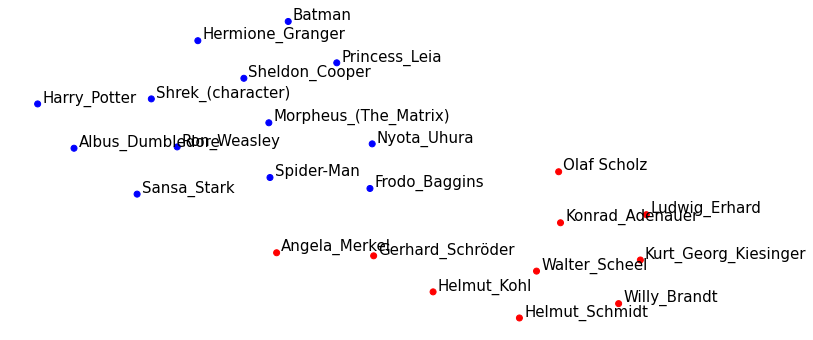

In [251]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Reduce the dimensions of entity embeddings to represent them in a 2D plane.
X_tsne = TSNE(random_state=0, perplexity=10).fit_transform(df.drop(["label", "color"], axis=1))

#colors = list(map(lambda e: "#00ff00" if movieFull[movieFull.DBpedia_URI==e].iloc[0].label == "good" else "#ff0000", transformer._entities[:]))
#sizes = list(map(lambda e: abs(50-movieFull[movieFull.DBpedia_URI==e].iloc[0].rating)**2, transformer._entities[:]))

# Plot the embeddings of entities in a 2D plane, annotating them.
f = plt.figure(figsize=(12, 6))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df.color)#c=colors, s=sizes)

for x, y, t in zip(X_tsne[:, 0], X_tsne[:, 1], df["label"]):
    plt.annotate(t, (x+3, y+3), fontsize=15)

# Display the graph with a title, removing the axes for better readability.
# plt.title("pyRDF2Vec", fontsize=4)
plt.axis("off")

#plt.show()

f.savefig("figure.pdf", bbox_inches='tight')

(-205.8281967163086, 202.58631439208983, -244.98173828125, 336.88670654296874)

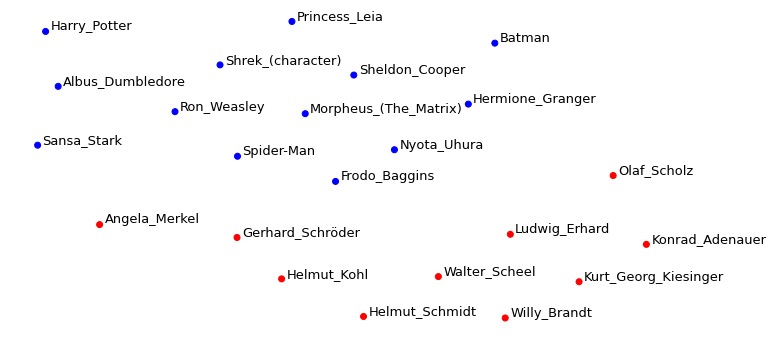

In [269]:

f = plt.figure(figsize=(12, 6))
plt.scatter(df.x, df.y, c=df.color)#c=colors, s=sizes)

for x, y, t in zip(df.x, df.y, df["label"]):
    plt.annotate(t, (x+3, y+3), fontsize=13)

# Display the graph with a title, removing the axes for better readability.
# plt.title("pyRDF2Vec", fontsize=4)
plt.axis("off")


In [245]:
df[["label", "color", "x", "y"]].to_csv("chancellor_embedding.csv", index=False)

In [265]:
# Replace "Olaf Scholz" with "Olaf_Scholz" in df
df.loc[df["label"] == "Olaf Scholz", "label"] = "Olaf_Scholz"

In [270]:
f.savefig("figure.pdf", bbox_inches='tight')